In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
titanic_data=pd.read_csv("D:\\Downloads\\train.csv.zip", encoding='windows-1251', sep=',')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [4]:
survivals_mean=titanic_data.Survived.mean()
survivals_mean

0.42774

,Survived,number
0,0,57226
1,1,42774


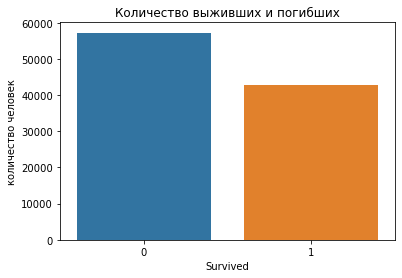

In [20]:
survived=titanic_data.groupby('Survived', as_index=False).agg({'PassengerId':'count'}).rename(columns={'PassengerId':'number'})
plt.title("Количество выживших и погибших")
sns.barplot(x=survived.Survived, y=survived['number'])
plt.ylabel("количество человек")
survived

,Pclass,all_number
0,1,30315
1,2,28679
2,3,41006


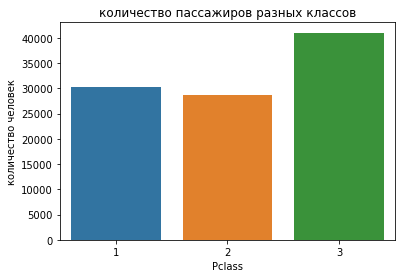

In [12]:
classes=titanic_data.groupby('Pclass', as_index=False).agg({'PassengerId':'count'}).rename(columns={'PassengerId':'all_number'})
plt.title("количество пассажиров разных классов")
sns.barplot(x=classes.Pclass, y=classes['all_number'])
plt.ylabel("количество человек")
classes

Text(0, 0.5, 'количество человек')

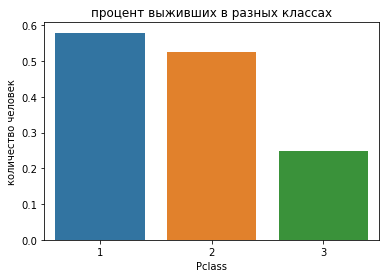

In [16]:
classes_survived=titanic_data.groupby('Pclass', as_index=False).agg({'Survived':'sum'})
classes_survived=classes_survived.merge(classes,on='Pclass')
classes_survived['percentage_survive']=classes_survived.Survived/classes_survived.all_number
plt.title("процент выживших в разных классах")
sns.barplot(x=classes_survived.Pclass, y=classes_survived['percentage_survive'])
plt.ylabel("количество человек")

Text(0.5, 1.0, 'процент выживших и погибших мужчин и женщин')

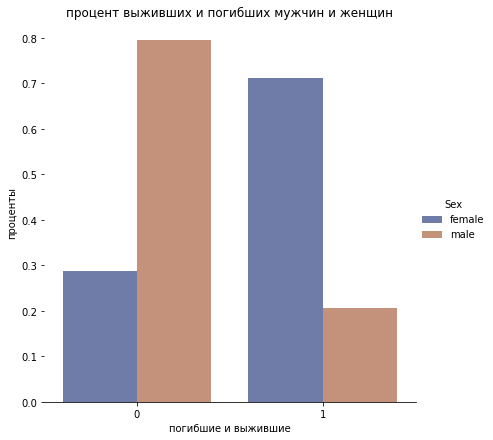

In [78]:
sex=titanic_data.groupby(['Sex'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
sex_survived=titanic_data.groupby(['Sex','Survived'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
sex_survived=sex_survived.merge(sex, on='Sex').rename(columns={'number_x':'number', 'number_y':'total'})
sex_survived['percentage']=sex_survived.number/sex_survived.total
sex_survived
g = sns.catplot(
    data=sex_survived, kind="bar",
    x="Survived", y="percentage", hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("погибшие и выжившие", "проценты")
plt.title("процент выживших и погибших мужчин и женщин")


<AxesSubplot:title={'center':'Возраст пассажиров'}, xlabel='Age', ylabel='number'>

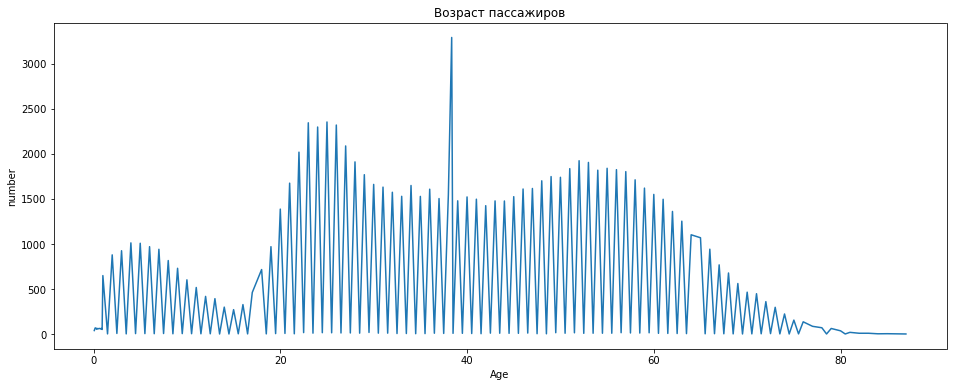

In [58]:
titanic_age=titanic_data.groupby('Age', as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
titanic_age
plt.figure(figsize=(16,6))
plt.title("Возраст пассажиров")
sns.lineplot(data=titanic_age, x="Age", y="number")

In [28]:
#замещение NaN в 'Age' средним значением
titanic_data.Age=titanic_data.Age.fillna(titanic_data.Age.mean())

In [31]:
age_mean=titanic_data.Age.mean()

38.35547214294454

Text(0, 0.5, 'средний возраст')

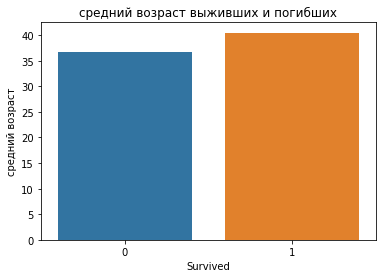

In [40]:
average_age=titanic_data.groupby('Survived',as_index=False).agg({'Age':'mean'})
plt.title("средний возраст выживших и погибших")
sns.barplot(x=average_age.Survived, y=average_age['Age'])
plt.ylabel("средний возраст")

Text(0.5, 1.0, 'средний возраст выживших и погибших мужчин и женщин')

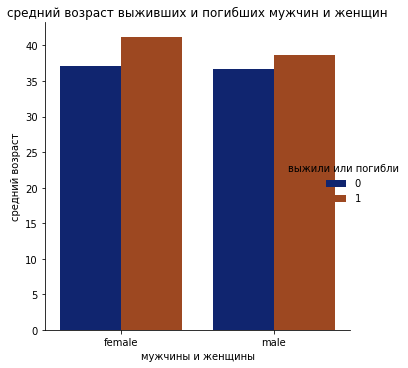

In [79]:
age_sex=titanic_data.groupby(['Sex', 'Survived'], as_index=False).agg({'Age':'mean'}).rename(columns={'Age':'mean_age'})
g1 = sns.catplot(
    data=age_sex, kind="bar",
    x="Sex", y="mean_age", hue="Survived",
    palette="dark"
)
g1.set_axis_labels("мужчины и женщины", "средний возраст")
g1.legend.set_title("выжили или погибли")
plt.title("средний возраст выживших и погибших мужчин и женщин")

In [86]:
def child(a):
    if a<18:
        return 'child'
    else:
        return 'adult'    
titanic_data['who']=titanic_data.Age.apply(child)


Text(0.5, 0.98, 'процент выживших взрослых и детей в каждом классе')

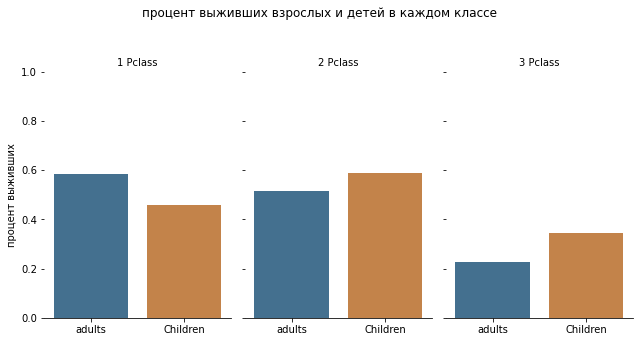

In [141]:
total_classes_who=titanic_data.groupby(['Pclass', 'who'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'total'})
survived_classes_who=titanic_data.query('Survived==1').groupby(['Pclass', 'who'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'survived'})
classes_who=total_classes_who.merge(survived_classes_who)
classes_who['percentage_survival']=classes_who.survived/classes_who.total
classes_who

g2 = sns.catplot(x="who", y="percentage_survival", col="Pclass",
                data=classes_who, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g2.set_axis_labels("", "процент выживших")
  .set_xticklabels(["adults", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True)) 
g2.fig.subplots_adjust(top=.8)
g2.fig.suptitle('процент выживших взрослых и детей в каждом классе')

Text(0.5, 0.98, 'процент выживших мужчин, женщин и детей в каждом классе')

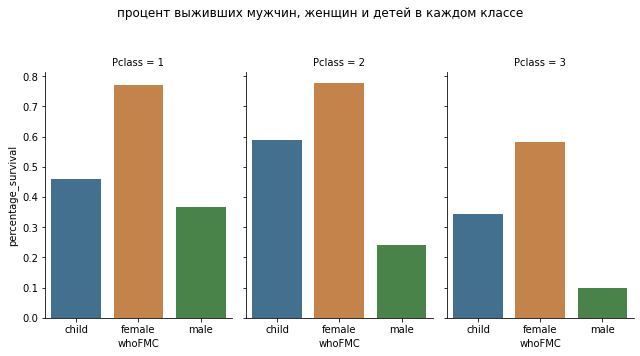

In [140]:
titanic_data['whoFMC']=titanic_data.query('who=="adult"').Sex
titanic_data['whoFMC'].fillna('child', inplace=True)

total_classes_whoFMC=titanic_data.groupby(['Pclass', 'whoFMC'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'total'})
survived_classes_whoFMC=titanic_data.query('Survived==1').groupby(['Pclass', 'whoFMC'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'survived'})
classes_whoFMC=total_classes_whoFMC.merge(survived_classes_whoFMC)
classes_whoFMC['percentage_survival']=classes_whoFMC.survived/classes_whoFMC.total


g3 = sns.catplot(x="whoFMC", y="percentage_survival", col="Pclass",
               data=classes_whoFMC, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g3.fig.subplots_adjust(top=.8)
g3.fig.suptitle('процент выживших мужчин, женщин и детей в каждом классе')

Text(0, 0.5, 'количество человек')

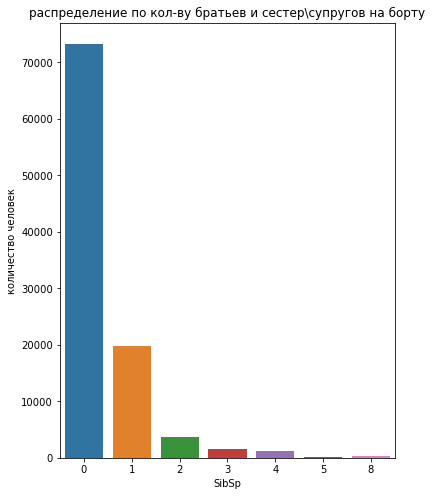

In [167]:
sb_sp_total=titanic_data.groupby('SibSp', as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
plt.figure(figsize=(6,8))
plt.title("распределение по кол-ву братьев и сестер\супругов на борту")
sns.barplot(x=sb_sp_total.SibSp, y=sb_sp_total.number)
plt.ylabel("количество человек")

Text(0.5, 0.98, 'процент выживших в зависимости от кол-ва братьев и сестер\\супругов')

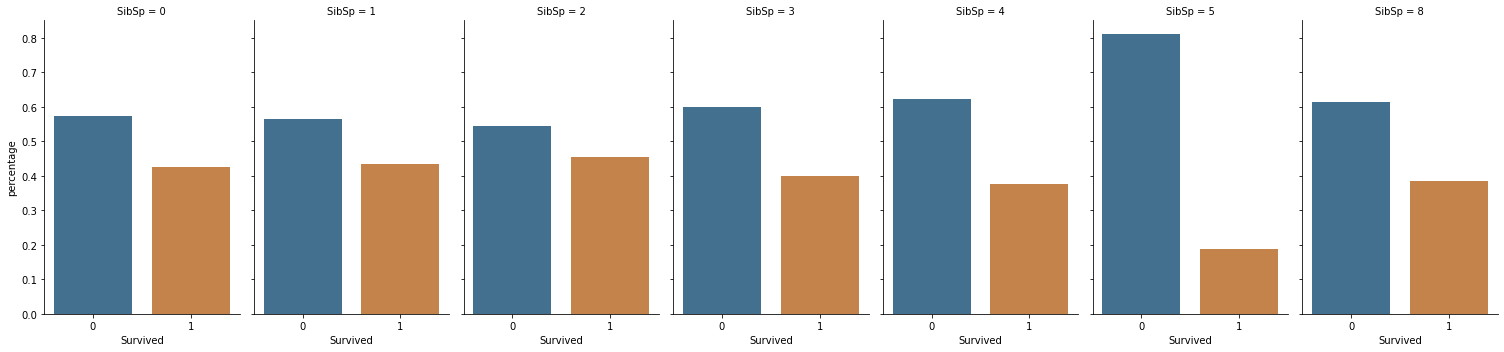

In [166]:
sb_sp=titanic_data.groupby(['SibSp','Survived'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
sb_sp=sb_sp_total.merge(sb_sp, on='SibSp').rename(columns={'number_x':'total', 'number_y':'number'})
sb_sp['percentage']=sb_sp.number/sb_sp.total
g4 = sns.catplot(x="Survived", y="percentage", col="SibSp",
               data=sb_sp, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g3.fig.subplots_adjust(top=.8)
g3.fig.suptitle('процент выживших в зависимости от кол-ва братьев и сестер\супругов')

Text(0, 0.5, 'количество человек')

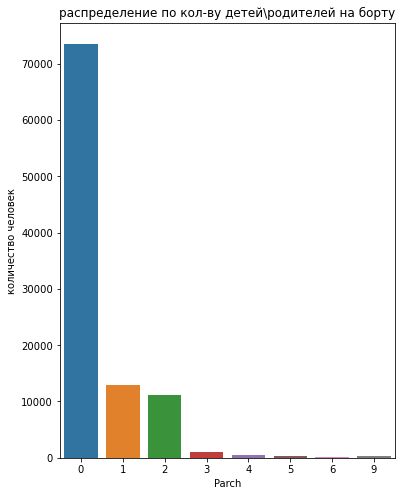

In [173]:
pa_ch_total=titanic_data.groupby('Parch', as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
plt.figure(figsize=(6,8))
plt.title("распределение по кол-ву детей\родителей на борту")
sns.barplot(x=pa_ch_total.Parch, y=pa_ch_total.number)
plt.ylabel("количество человек")

Text(0.5, 0.98, 'процент выживших в зависимости от кол-ва детей\\родителей')

<Figure size 1296x720 with 0 Axes>

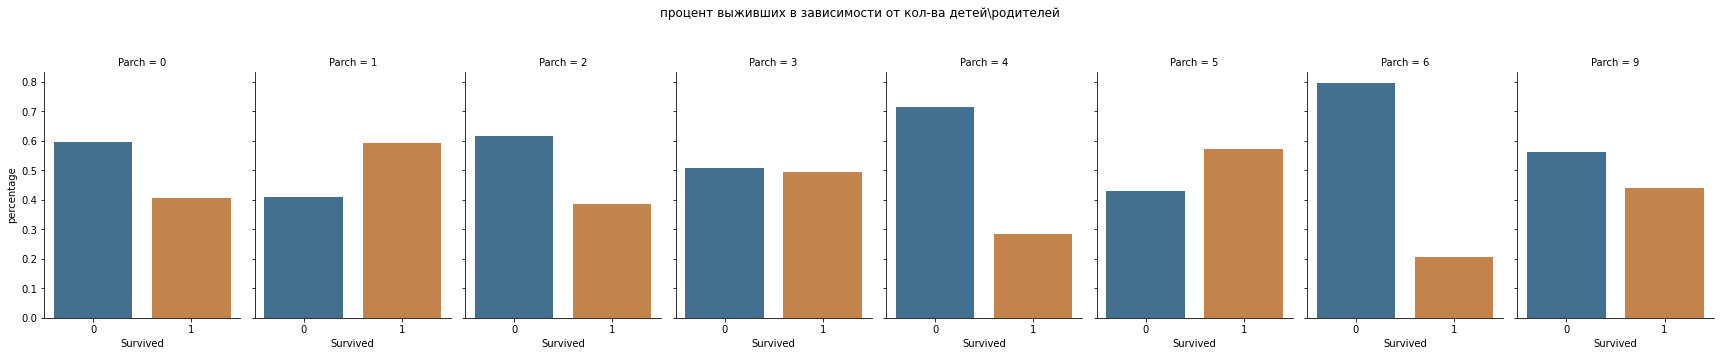

In [263]:
pa_ch=titanic_data.groupby(['Parch','Survived'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
pa_ch=pa_ch_total.merge(pa_ch, on='Parch').rename(columns={'number_x':'total', 'number_y':'number'})
pa_ch['percentage']=pa_ch.number/pa_ch.total
plt.figure(figsize=(18,10))
g4 = sns.catplot(x="Survived", y="percentage", col="Parch",
               data=pa_ch, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g4.fig.subplots_adjust(top=.8)
g4.fig.suptitle('процент выживших в зависимости от кол-ва детей\родителей')

In [184]:
fare_mean=titanic_data.Fare.mean()
fare_mean

43.92933040273962

<AxesSubplot:title={'center':'плата за проезд'}, xlabel='Fare', ylabel='count'>

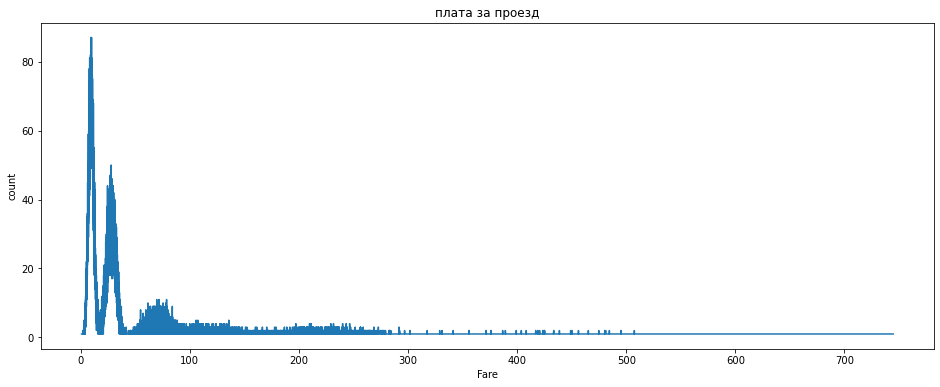

In [215]:
fare=titanic_data.groupby('Fare', as_index=False).agg({'PassengerId':'count'})\
    .sort_values('Fare', ascending=False)\
    .rename(columns={'PassengerId':'count'})
plt.figure(figsize=(16,6))
plt.title("плата за проезд")
sns.lineplot(data=fare, x="Fare", y="count")


Text(0, 0.5, 'средняя плата')

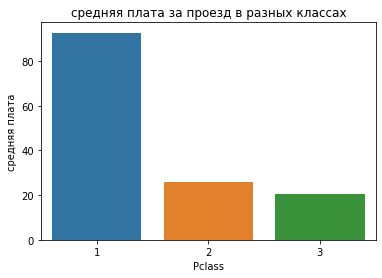

In [225]:
mean_fare=titanic_data.groupby('Pclass', as_index=False).agg({'Fare':'mean'})
plt.title("средняя плата за проезд в разных классах")
sns.barplot(x=mean_fare.Pclass, y=mean_fare.Fare)
plt.ylabel("средняя плата")


Text(0.5, 0.98, 'процент выживших в зависимости от палубы')

<Figure size 1296x720 with 0 Axes>

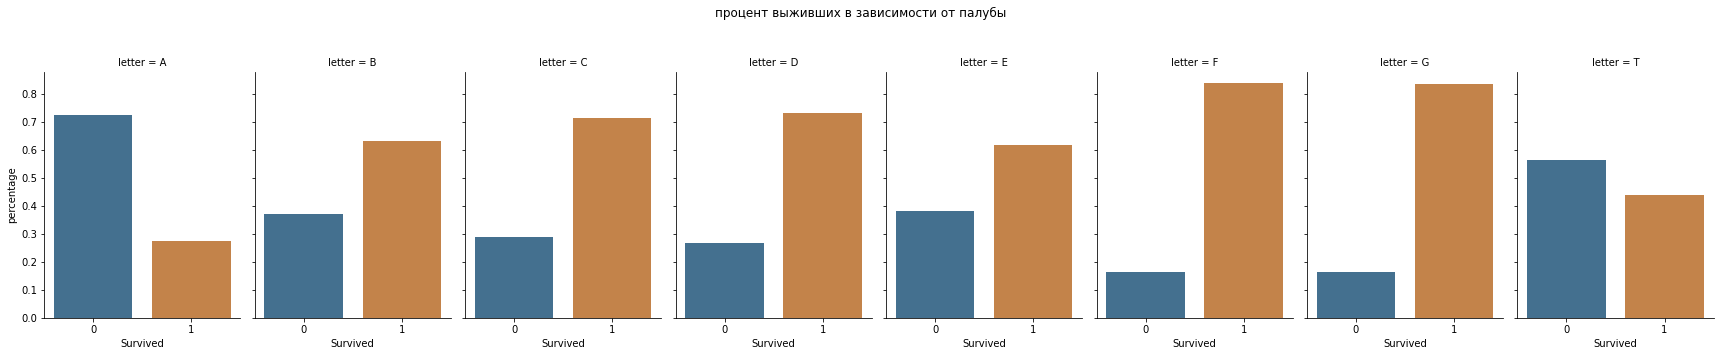

In [266]:
#удалили NaN в колонке Cabin
cabin_new=titanic_data.dropna(subset = ['Cabin'])
#из названия каюты выделили первую букву в колонку letter, она обозначает номер палубы, А вверху, G- внизу
cabin_new=cabin_new['Cabin'].apply(lambda x:list(x)[0]).to_frame().merge(cabin_new, left_index=True, right_index=True)\
    .rename(columns={'Cabin_x':'letter'})
cabin_new_survived=cabin_new.groupby(['letter','Survived'], as_index=False).agg({'PassengerId':'count'})
cabin_new_total=cabin_new.groupby('letter', as_index=False).agg({'PassengerId':'count'})
cabin_new_survived=cabin_new_survived.merge(cabin_new_total, on='letter')\
    .rename(columns={'PassengerId_x':'count', 'PassengerId_y':'total'})
cabin_new_survived['percentage']=cabin_new_survived['count']/cabin_new_survived.total
plt.figure(figsize=(18,10))
g5 = sns.catplot(x="Survived", y="percentage", col="letter",
               data=cabin_new_survived, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g5.fig.subplots_adjust(top=.8)
g5.fig.suptitle('процент выживших в зависимости от палубы')

In [267]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who,whoFMC
0,0,1,1,"Oconnor, Frankie",male,38.355472,2,0,209245,27.14,C12239,S,adult,male
1,1,0,3,"Bryan, Drew",male,38.355472,0,0,27323,13.35,NaN,S,adult,male
2,2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,NaN,S,child,child
3,3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,NaN,S,adult,male
4,4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,NaN,S,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.000000,0,0,PC 15008,14.86,D17243,C,adult,female
99996,99996,0,2,"Brown, Herman",male,66.000000,0,0,13273,11.15,NaN,S,adult,male
99997,99997,0,3,"Childress, Charles",male,37.000000,0,0,NaN,9.95,NaN,S,adult,male
99998,99998,0,3,"Caughlin, Thomas",male,51.000000,0,1,458654,30.92,NaN,S,adult,male
